# Import Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Business Problem

SyriaTel, a telecommunications company, is interested in knowing the important factors in determining whether or not a customer will stay with the company. Using customer account data, this notebook will provide classification models aimed at predicting churn.   

# Load Data

In [2]:
#Load dataset
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 - Data appears to have no missing values.

# Data Cleaning

In [5]:
#Update column names
updated_columns = []
for c in df.columns:
    updated_columns.append(c.replace(' ', '_'))
df.columns = updated_columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [6]:
#Convert area_code column to object 
df['area_code'] = df.area_code.astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

## Data Exploration

In [8]:
#Check value counts for churn
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

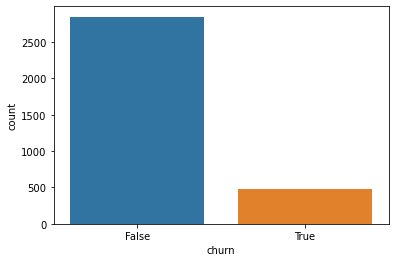

In [9]:
#Countplot for churn column
sns.countplot(x='churn', data=df)

 - Data contains significatly more 'false's then 'true's, this will need to be addressed later when building models. 

<AxesSubplot:xlabel='state', ylabel='count'>

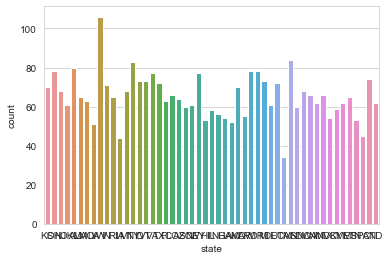

In [70]:
# Countplot for state column
sns.countplot(x='state', data=df)

 - States will need to be converted to categorical feature for models.

In [11]:
#Check unique values of state column
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [69]:
#Check value counts for state column
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
NV     66
CO     66
WA     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

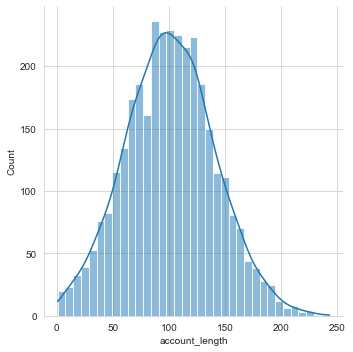

In [12]:
#Check distribution of account_length column
sns.displot(x=df['account_length'],kind='hist', kde=True);

 - Account length appears to be normally distributed.

<AxesSubplot:xlabel='area_code', ylabel='count'>

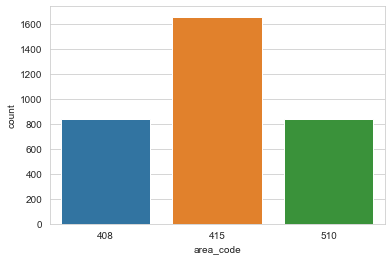

In [68]:
#Countplot for area_code column
sns.countplot(x='area_code', data=df)

In [146]:
#Check value counts for area_code column
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

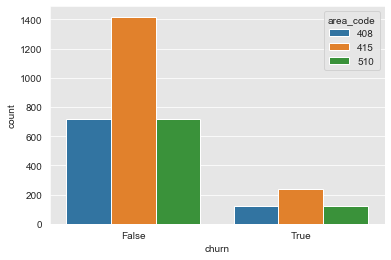

In [145]:
sns.countplot(x='churn', hue='area_code', data=df)

 - Area code only contains three different values, which appear evenly distributed across churn. Will likely drop this column. 

<AxesSubplot:xlabel='international_plan', ylabel='count'>

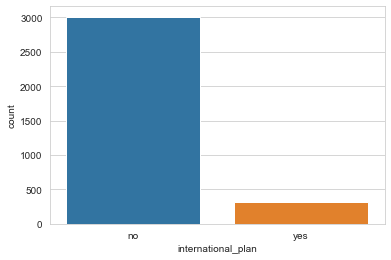

In [71]:
#Countplot for international_plan column
sns.countplot(x='international_plan', data=df)

 - Internaional plan will need to be converted to categorical feature.
 
 - Appears to have significantly more 'no's then 'yes's.

<AxesSubplot:xlabel='churn', ylabel='count'>

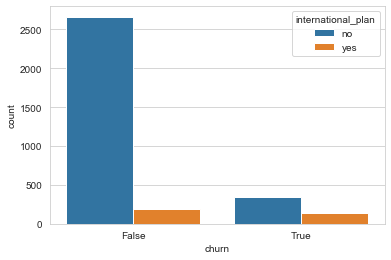

In [17]:
# Countplot showing distribution of international_plan by churn
sns.countplot(x='churn', hue='international_plan', data=df)

 - It appears both categories contain a similar number of 'yes's despite the much greater number of False-churns from the data. This could be an idication that customers with True-churn are more likely to have an international plan. This could mean that international is a good predictor of churn.

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

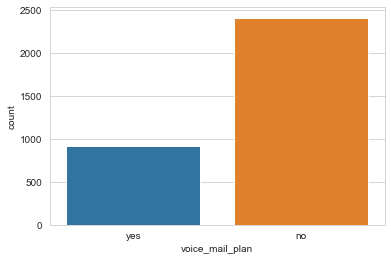

In [72]:
#Countplot of voice_mail_plan column
sns.countplot(x='voice_mail_plan', data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

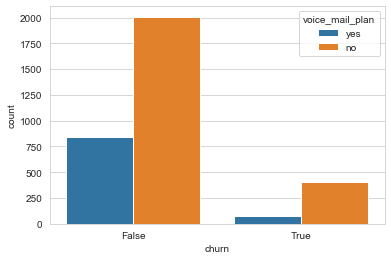

In [19]:
# Countplot showing distribution of voice_mail_plan by churn
sns.countplot(x='churn', hue='voice_mail_plan', data=df)

 - Voice mail plan appears to be similar across churn despite the unbalanced data, and is likely not a great predictor of churn.

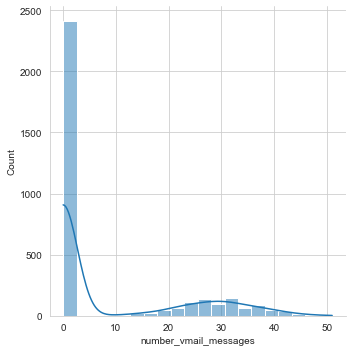

In [20]:
#Check distribution of number_vmail_messages column
sns.displot(x=df['number_vmail_messages'],kind='hist',kde=True);

 - Number vmail messages does not appear evenly distributed with a large portion of customers having 0 messages. 

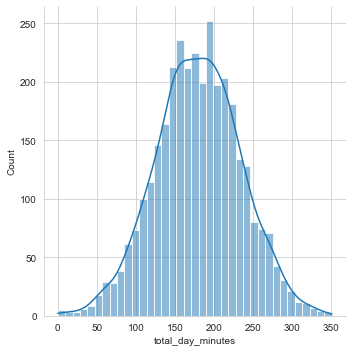

In [21]:
#Check distribution of total_day_minutes column
sns.displot(x=df['total_day_minutes'],kind='hist',kde=True);

 - Total day minutes appears to be normally distributed.

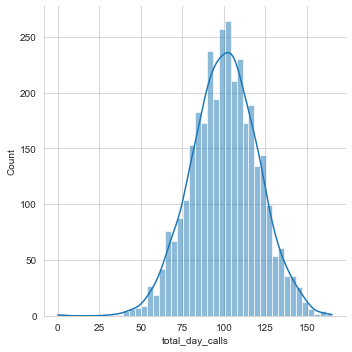

In [22]:
#Check distribution of total_day_calls column
sns.displot(x=df['total_day_calls'],kind='hist',kde=True);

 - Total day calls appears to be normally distributed.

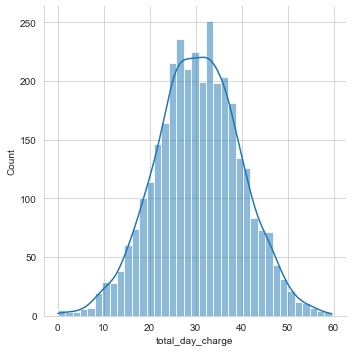

In [23]:
#Check distribution of total_day_charge column
sns.displot(x=df['total_day_charge'],kind='hist',kde=True);

 - Total day charge appears to be normally distributed.

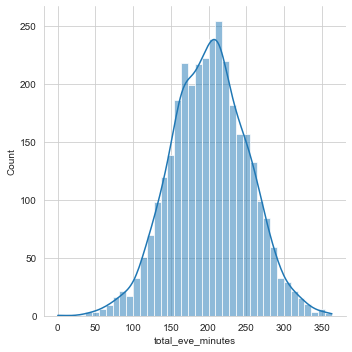

In [24]:
#Check distribution of total_eve_minutes column
sns.displot(x=df['total_eve_minutes'],kind='hist',kde=True);

 - Total eve minutes appears to be normally distributed.

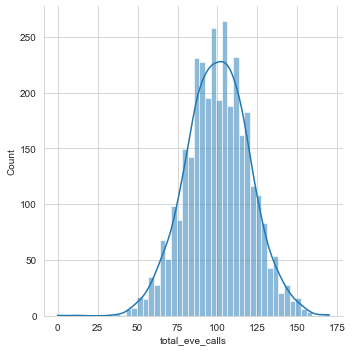

In [25]:
#Check distribution of total_eve_calls column
sns.displot(x=df['total_eve_calls'],kind='hist',kde=True);

 - Total eve calls appears to be normally distributed.

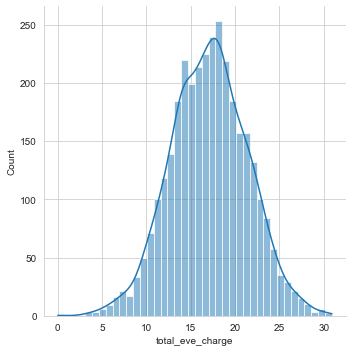

In [26]:
#Check distribution of total_eve_charge column
sns.displot(x=df['total_eve_charge'],kind='hist',kde=True);

 - Total eve charge appears to be normally distributed.

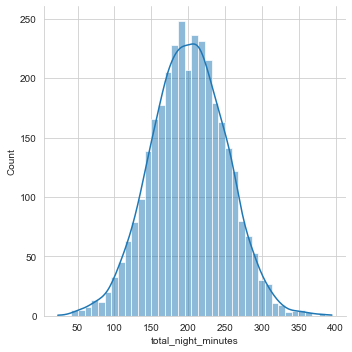

In [27]:
#Check distribution of total_night_minutes column
sns.displot(x=df['total_night_minutes'],kind='hist',kde=True);

 - Total night minutes appears to be normally distributed.

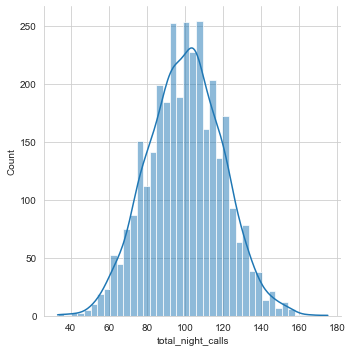

In [28]:
#Check distribution of total_night_calls column
sns.displot(x=df['total_night_calls'],kind='hist',kde=True);

 - Total night calls appears to be normally distributed.

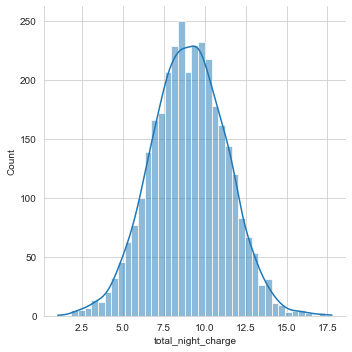

In [29]:
#Check distribution of total_night_charge column
sns.displot(x=df['total_night_charge'],kind='hist',kde=True);

 - Total night charge appears to be normally distributed.

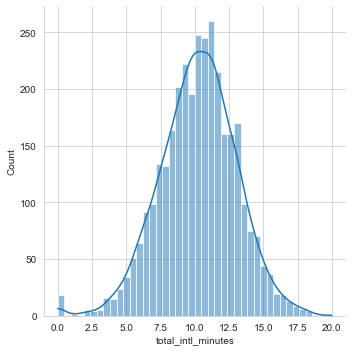

In [30]:
#Check distribution of total_intl_minutes column
sns.displot(x=df['total_intl_minutes'],kind='hist',kde=True);

 - Total intl minutes appears to be normally distributed.

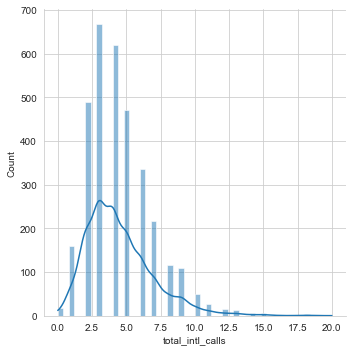

In [31]:
#Check distribution of total_intl_calls column
sns.displot(x=df['total_intl_calls'],kind='hist',kde=True);

 - Total intl calls appears somewhat evenly distributed except for outliers over about 12.

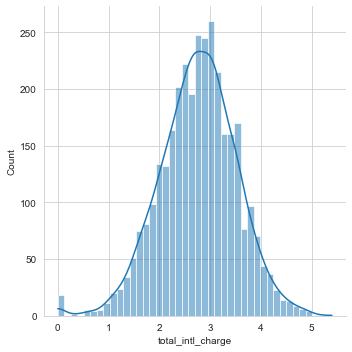

In [32]:
#Check distribution of total_intl_charge column
sns.displot(x=df['total_intl_charge'],kind='hist',kde=True);

 - Total intl charge appears to be normally distributed.

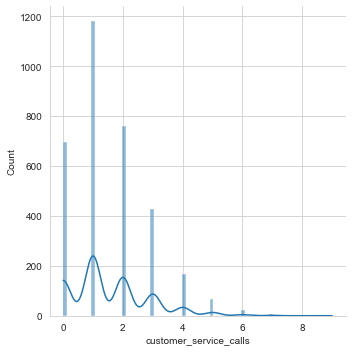

In [33]:
#Check distribution of customer_service_calls column
sns.displot(x=df['customer_service_calls'],kind='hist',kde=True);

 - Customer service calls does not appear to be evenly distributed.

## Pivot Table - Feature Averages

In [34]:
#Pivot table to check averages of columns across churn
pd.pivot_table(df, index='churn', values=['account_length', 'number_vmail_messages', 'total_day_minutes',
                                                  'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                                                  'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                                                  'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                                                  'total_intl_calls', 'total_intl_charge', 'customer_service_calls'])

,account_length,customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes
churn,,,,,,,,,,,,,,,
False,100.793684,1.449825,8.604561,100.283158,29.780421,175.175754,100.038596,16.918909,199.043298,4.532982,2.743404,10.158877,100.058246,9.006074,200.133193
True,102.664596,2.229814,5.115942,101.335404,35.175921,206.914079,100.561077,18.054969,212.410145,4.163561,2.889545,10.700000,100.399586,9.235528,205.231677


 - Noticed higher average customer service calls for True-churn. This could be an indicator that as cusomter service calls increase so does churn.
 - Higher average number vmail messages for False-churn. 
 - Also higher average charge and minutes for True-churn. 

## Check for Multicollinearity

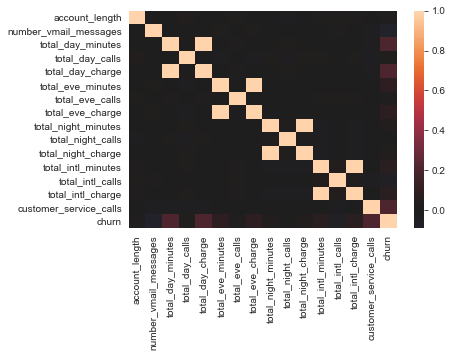

In [35]:
#Create heatmap to check for highly correlated features.
sns.heatmap(df.corr(), center=0);

 -  total_day_charge, total_day_calls, and total_day_minutes are highly correlated.

 - total_eve_charge, total_eve_calls, and total_eve_minutes are highly correlated.

 - total_night_charge, total_night_calls, and total_night_minutes are highly correlated.

 - total_intl_charge, total_intl_calls, and total_intl_minutes are highly correlated.
 
 > - Will need to seperate these features when building models to prevent multicollinearity.

## Drop Columns

In [36]:
df_filtered = df.drop(['area_code', 'phone_number'], axis=1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

## Feature Engineering

In [37]:
total_charge = df_filtered['total_day_charge'] + df_filtered['total_eve_charge'] + df_filtered['total_night_charge'] + df_filtered['total_intl_charge']
df_filtered['total_charge'] = total_charge
df_filtered.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [38]:
pd.pivot_table(df_filtered, index='churn', values='total_charge')

,total_charge
churn,
False,58.448807
True,65.355963


## Split Data into Training and Testing sets

In [165]:
X = df_filtered.drop(['churn'], axis=1)
y = df_filtered['churn']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 19), (834, 19), (2499,), (834,))

## Label Encoding

In [177]:
labelencoder = LabelEncoder()
labelencoder.fit(X_train['state'])
X_train_state_lb = labelencoder.transform(X_train['state'])

In [219]:
labelencoder.fit(X_test['state'])
X_test_state_lb = labelencoder.transform(X_test['state'])

In [220]:
labelencoder.fit(X_train['international_plan'])
X_train_intl_lb = labelencoder.transform(X_train['international_plan'])

In [221]:
labelencoder.fit(X_test['international_plan'])
X_test_intl_lb = labelencoder.transform(X_test['international_plan'])

In [222]:
labelencoder.fit(X_train['voice_mail_plan'])
X_train_vm_lb = labelencoder.transform(X_train['voice_mail_plan'])

In [223]:
labelencoder.fit(X_test['voice_mail_plan'])
X_test_vm_lb = labelencoder.transform(X_test['voice_mail_plan'])

In [224]:
labelencoder.fit(y_train)
y_train_lb = labelencoder.transform(y_train)

In [225]:
labelencoder.fit(y_train)
y_test_lb = labelencoder.transform(y_test)

In [226]:
X_train_state_lb.shape, X_train_intl_lb.shape, X_train_vm_lb.shape

((834,), (2499,), (2499,))

In [231]:
X_train_labels = pd.concat(
    (pd.Series(X_train_state_lb), 
     pd.Series(X_train_intl_lb), 
     pd.Series(X_train_vm_lb)), 
    axis=1)
X_train_labels.head()

,0,1,2
0,50.0,0,0
1,14.0,0,0
2,41.0,0,1
3,17.0,0,0
4,50.0,0,0


In [247]:
pd.concat((pd.Dataframe(X_train_labels), X_train, axis=1)

SyntaxError: invalid syntax (<ipython-input-247-5e7162381805>, line 1)

In [248]:
X_test_labels = pd.concat(
    (pd.Series(X_test_state_lb), 
     pd.Series(X_test_intl_lb), 
     pd.Series(X_test_vm_lb)), 
    axis=1)
X_test_labels.head()

,0,1,2
0,50,0,0
1,14,0,0
2,41,0,0
3,17,0,0
4,50,0,0


In [249]:
X_train_labels.shape

(2499, 3)

## Convert Categorical Features

In [234]:
#Transform international_plan and voice_mail_plan to categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[['international_plan', 'voice_mail_plan']])
X_train_ohe = ohe.transform(X_train[['international_plan', 'voice_mail_plan']])
X_test_ohe = ohe.transform(X_test[['international_plan', 'voice_mail_plan']])

In [235]:
X_train.shape

(2499, 19)

In [236]:
# X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names())
X_train_ohe.shape

(2499, 4)

In [237]:
X_train

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_charge
367,MD,45,no,no,0,78.2,127,13.29,253.4,108,21.54,255.0,100,11.48,18.0,3,4.86,1,51.17
3103,DE,115,no,no,0,195.9,111,33.30,227.0,108,19.30,313.2,113,14.09,13.2,1,3.56,2,70.25
549,OK,121,no,yes,31,237.1,63,40.31,205.6,117,17.48,196.7,85,8.85,10.1,5,2.73,4,69.37
2531,RI,180,no,no,0,143.3,134,24.36,180.5,113,15.34,184.2,87,8.29,10.1,4,2.73,1,50.72
2378,OR,112,no,no,0,206.2,122,35.05,164.5,94,13.98,140.3,101,6.31,12.6,7,3.40,3,58.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,ID,106,no,no,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1,72.39
1130,PA,122,no,no,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1,36.09
1294,OR,66,no,no,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1,47.95
860,HI,169,no,no,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2,58.31


In [238]:
#Combine new dataframe containing categorical features to X_train 
X_train_3 = pd.concat(
    [X_train.reset_index(drop=True), 
     pd.DataFrame(X_train_ohe).reset_index(drop=True)], 
    axis=1)
X_train_3.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_charge,0,1,2,3
0,MD,45,no,no,0,78.2,127,13.29,253.4,108,...,11.48,18.0,3,4.86,1,51.17,1.0,0.0,1.0,0.0
1,DE,115,no,no,0,195.9,111,33.30,227.0,108,...,14.09,13.2,1,3.56,2,70.25,1.0,0.0,1.0,0.0
2,OK,121,no,yes,31,237.1,63,40.31,205.6,117,...,8.85,10.1,5,2.73,4,69.37,1.0,0.0,0.0,1.0
3,RI,180,no,no,0,143.3,134,24.36,180.5,113,...,8.29,10.1,4,2.73,1,50.72,1.0,0.0,1.0,0.0
4,OR,112,no,no,0,206.2,122,35.05,164.5,94,...,6.31,12.6,7,3.40,3,58.74,1.0,0.0,1.0,0.0


In [239]:
X_train_3.shape

(2499, 23)

In [240]:
#Drop international_plan and voice_mail_plan 
X_train_3.drop(['international_plan', 'voice_mail_plan'], axis=1)

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_charge,0,1,2,3
0,MD,45,0,78.2,127,13.29,253.4,108,21.54,255.0,...,11.48,18.0,3,4.86,1,51.17,1.0,0.0,1.0,0.0
1,DE,115,0,195.9,111,33.30,227.0,108,19.30,313.2,...,14.09,13.2,1,3.56,2,70.25,1.0,0.0,1.0,0.0
2,OK,121,31,237.1,63,40.31,205.6,117,17.48,196.7,...,8.85,10.1,5,2.73,4,69.37,1.0,0.0,0.0,1.0
3,RI,180,0,143.3,134,24.36,180.5,113,15.34,184.2,...,8.29,10.1,4,2.73,1,50.72,1.0,0.0,1.0,0.0
4,OR,112,0,206.2,122,35.05,164.5,94,13.98,140.3,...,6.31,12.6,7,3.40,3,58.74,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,ID,106,0,274.4,120,46.65,198.6,82,16.88,160.8,...,7.24,6.0,3,1.62,1,72.39,1.0,0.0,1.0,0.0
2495,PA,122,0,35.1,62,5.97,180.8,89,15.37,251.6,...,11.32,12.7,2,3.43,1,36.09,1.0,0.0,1.0,0.0
2496,OR,66,0,87.6,76,14.89,262.0,111,22.27,184.6,...,8.31,9.2,5,2.48,1,47.95,1.0,0.0,1.0,0.0
2497,HI,169,0,179.2,111,30.46,175.2,130,14.89,228.6,...,10.29,9.9,6,2.67,2,58.31,1.0,0.0,1.0,0.0


## Scale Data

In [126]:
scaler = StandardScaler()
scaler.fit(X_train_ohe)

X_train_scaled = scaler.transform(X_train_3)
X_test_scaled = scaler.transform()

# Modeling

## Model A - Statsmodel

In [ ]:
X = sm.add_constant(X_scaled_train_a)
logit_model=sm.Logit(y_train_a, X)
result=logit_model.fit()
print(result.summary())

## Model B - Logistic Regression Model

In [128]:
model_b = LogisticRegression(solver='liblinear', class_weight='balanced')

In [129]:
model_b.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [130]:
model_b.coef_

array([[-0.28475972,  0.28475972,  0.19605855, -0.19605855]])

In [131]:
model_b.predict_proba(X_test_scaled)

array([[0.52562363, 0.47437637],
       [0.52562363, 0.47437637],
       [0.52562363, 0.47437637],
       ...,
       [0.72783305, 0.27216695],
       [0.72783305, 0.27216695],
       [0.52562363, 0.47437637]])

In [132]:
y_pred_b = model_b.predict(X_test_scaled)

In [133]:
conf_mx = confusion_matrix(y_test, y_pred_b)
conf_mx

array([[660,  49],
       [ 93,  32]])

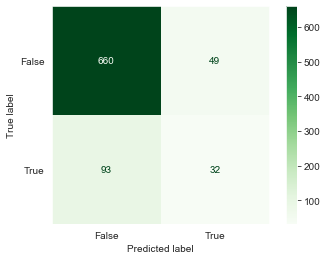

In [134]:
plot_confusion_matrix(model_b, X_test_scaled, y_test, cmap='Greens')
plt.grid(False)

In [135]:
print(classification_report(y_test, model_b.predict(X_test_scaled)))

              precision    recall  f1-score   support

       False       0.88      0.93      0.90       709
        True       0.40      0.26      0.31       125

    accuracy                           0.83       834
   macro avg       0.64      0.59      0.61       834
weighted avg       0.80      0.83      0.81       834



In [136]:
y_score = model_b.decision_function(X_test_scaled)

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [138]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.659700987306065


AUC: 0.6644118476727785


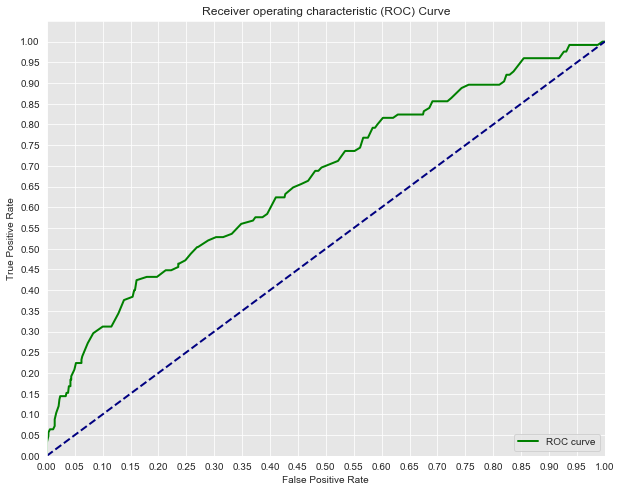

In [123]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model C - Decesion Tree

In [ ]:
features_c = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_c = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [106]:
model_c = DecisionTreeClassifier(max_depth=3, random_state=42)  
model_c.fit(X_train_scaled, y_train) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [107]:
y_pred_c = model_c.predict(X_test_scaled) 

In [109]:
acc = accuracy_score(y_test ,y_pred_c) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :85.13189448441247


In [110]:
print('Confusion Matrix:')
cnf_matrix = confusion_matrix(y_test, y_pred_c)
print(cnf_matrix)

Confusion Matrix:
[[709   0]
 [124   1]]


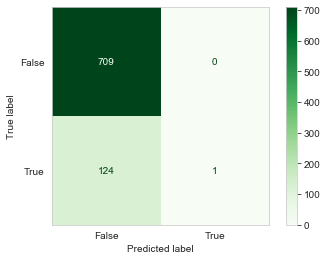

In [111]:
plot_confusion_matrix(model_c, X_test_scaled, y_test, cmap=plt.cm.Greens)
plt.grid(False)

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=300)
tree.plot_tree(model_c,
               feature_names = features_c.columns, 
               class_names=np.unique(df_updated_2['churn']).astype('str'),
               filled = True)
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_c, y_pred_c)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

In [ ]:
classifier_2 = DecisionTreeClassifier(max_depth=3, random_state=10, criterion='entropy')  
classifier_2.fit(X_train_c, y_train_c)

In [ ]:
from pydotplus import graph_from_dot_data

## Model D - Random Forest

In [113]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

TypeError: bar() got multiple values for keyword argument 'x'

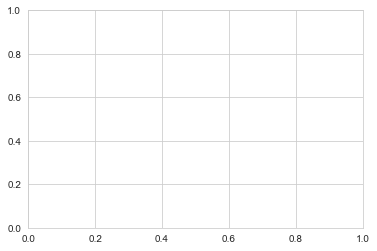

In [118]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, x=X_test, y= y_test)
fig.tight_layout()

In [ ]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_test))

## Model E - Support Vector Machine

## Model Comparisson

## Conclusion/Summary